## Data analysis

In [3]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for the yeo-johnson transformation
import scipy.stats as stats

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [4]:
#load dataset
df = pd.read_csv('../output/saida.csv')

# rows and columns
print(df.shape)

#visualise the data
df.head(200)

(484381, 35)


,id_form,id_cliente,data,sistema_operacional,navegador,localizacao,locale_x,cidade_x,estado_x,qtde_lavagem_semana,utm_source_x,tipo_cabelo,comprimento,tipo_fios,procedimentos,tempo_procedimento,dieta,atividade_fisica,frequencia_estresse,caracteristica,faixa_etaria,efeitos_desejados,fragancia,id_pedido,data_pedido,status_pagamento,tipo_pagamento,valor_total,valor_desconto,frete_gratis,cidade_y,estado_y,locale_y,utm_source_y,target
0,c7d453c9c01223a42968d9fe136047,d2620a3e6f00a6dc6e88,2022-01-03 15:42:22,iOS,Safari,"São Paulo, Sao Paulo",BR,SÃO PAULO,SAO PAULO,4,NaN,Tipo 2,Raíz exposta,Pontas duplas,Nenhum,Há 2 semanas,Celíaca,Frequente,Nunca,Característica 1,25 a 34,Efeito 7,Rosas,5d2301cb6bf9d7c,2022-01-03 15:47:35.000000,Entregue,CARTÃO,124.03,0.0,False,São Paulo,SP,BR,NaN,1.0
1,72830da153824af486be15cd48b3f3,9a48802d8290d19471f3,2022-01-04 08:39:53,Windows,Chrome,"Ribeirão Preto, Sao Paulo",BR,RIBEIRÃO PRETO,SAO PAULO,7,NaN,Tipo 4,Muito curto,Perfeitos,Todos acima,Há mais de 1 mês,Nenhuma restrição,Nunca,Nunca,Característica 6,55 a 64,Efeito 1,Eucalipto,f85766652b46e6e,2022-04-10 13:37:33.000000,Cancelado,PIX,282.22,0.0,False,Jundiaí,SP,BR,NaN,1.0
2,72830da153824af486be15cd48b3f3,9a48802d8290d19471f3,2022-01-04 08:39:53,Windows,Chrome,"Ribeirão Preto, Sao Paulo",BR,RIBEIRÃO PRETO,SAO PAULO,7,NaN,Tipo 4,Muito curto,Perfeitos,Todos acima,Há mais de 1 mês,Nenhuma restrição,Nunca,Nunca,Característica 6,55 a 64,Efeito 1,Eucalipto,5fea1872ca5ffa2,2022-04-10 13:43:05.000000,Cancelado,PIX,282.22,0.0,False,Jundiaí,SP,BR,NaN,1.0
3,d101fc0075dac29db1168cfc61ad44,c3344fad450ee424700d,2022-01-04 19:34:05,Android,Chrome,"São Paulo, Sao Paulo",BR,SÃO PAULO,SAO PAULO,2,NaN,Tipo 1,Extra longo,Rebeldes,Todos acima,Há mais de 1 mês,Nenhuma restrição,Raramente,Regularmente,Característica 7,2 a 10,Efeito 7,Rosas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0957fb9d7be36b4d079b6582bb6785,8105e34124e90300d8b5,2022-01-05 18:29:41,Android,Chrome,"Manchester, England",BR,MANCHESTER,ENGLAND,5,NaN,Tipo 1,Extra longo,Rebeldes,Todos acima,Há mais de 1 mês,Celíaca,Raramente,Regularmente,Característica 7,25 a 34,Efeito 7,Rosas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,23e96a22f9b0e126e0659b82fad00b,2ac468e731bc09f372d8,2022-01-11 20:57:52,Android,Chrome,"Alpinopolis, Minas Gerais",BR,ALPINOPOLIS,MINAS GERAIS,2,influencer,Tipo 4,Muito curto,Rebeldes,Todos acima,Há mais de 1 mês,Celíaca,Raramente,Nunca,Característica 8,11 a 17,"Efeito 6, Efeito 1",Rosas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,1d144c4a87e2fcdef8efe3aa185e7d,d825ce465d0e15cc004b,2022-01-12 09:55:05,iOS,NaN,"Fortaleza, Ceara",BR,FORTALEZA,CEARA,1,IGShopping,Tipo 2,Muito curto,Pontas duplas,Tintura,Há 2 semanas,Celíaca,Raramente,Nunca,Característica 7,25 a 34,Efeito 7,Rosas,492f20ddc8e1f92,2022-01-12 10:10:10.000000,Entregue,CARTÃO,134.00,0.0,False,Fortaleza,CE,BR,IGShopping,1.0
197,f7dd3f5c42a72ce1e1012ba312074f,6a39ba2d2ffcfa55e564,2022-01-11 21:06:03,Android,Chrome,"Cambe, Parana",BR,CAMBE,PARANA,1,facebook,Tipo 2,Raíz exposta,Rebeldes,Tintura,Há 1 semana,Nenhuma restrição,Raramente,Nunca,Característica 3,25 a 34,Efeito 7,Rosas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,d25e3f36c368f5b81137f2249e6d16,76eb4b6728894ee12aa5,2022-01-11 22:08:12,iOS,Safari,"Iguai, Bahia",BR,IGUAI,BAHIA,4,NaN,Tipo 2,Raíz exposta,Pontas duplas,Tintura,Há 2 semanas,Nenhuma restrição,Sempre,Nunca,"Característica 9, Característica 3",45 a 54,"Efeito 7, Efeito 8, Efeito 1, Efeito 3",Flores do campo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#drop columns, they are not useful for the analysis
df.drop(['id_form','status_pagamento', 'tipo_pagamento', 'valor_total',
       'valor_desconto', 'frete_gratis', 'cidade_y', 'estado_y', 'locale_y',
       'utm_source_y','id_pedido'], inplace = True, axis=1)

df.shape

(484381, 24)

### Analysis
We will analyse the following:

1.The target variable
2.Variable types (categorical and numerical)
3.Missing data
4.Numerical variables

 - Discrete
 - Continuous
 - Distributions
 - Transformations
 - Categorical variables

5.Cardinality
 - Rare Labels
 - Special mappings

6.Additional Reading Resources

## 1.The target variable

In [6]:
df.target.value_counts()


1.0    154933
Name: target, dtype: int64

In [7]:
df.target.isna().sum()

329448

In [8]:
df.target.fillna(0, inplace=True)

In [9]:
df.target.value_counts()

0.0    329448
1.0    154933
Name: target, dtype: int64

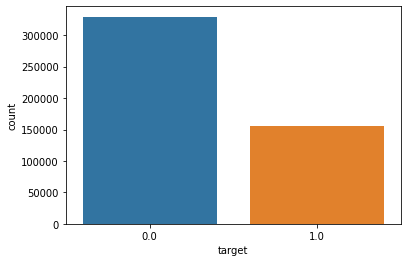

In [10]:
#bar plot of the target variable
sns.countplot(x='target', data=df)
plt.xlabel('target')
plt.ylabel('count')
plt.show()

## 2.Variable types (categorical and numerical)

In [11]:
df.head()

,id_cliente,data,sistema_operacional,navegador,localizacao,locale_x,cidade_x,estado_x,qtde_lavagem_semana,utm_source_x,tipo_cabelo,comprimento,tipo_fios,procedimentos,tempo_procedimento,dieta,atividade_fisica,frequencia_estresse,caracteristica,faixa_etaria,efeitos_desejados,fragancia,data_pedido,target
0,d2620a3e6f00a6dc6e88,2022-01-03 15:42:22,iOS,Safari,"São Paulo, Sao Paulo",BR,SÃO PAULO,SAO PAULO,4,NaN,Tipo 2,Raíz exposta,Pontas duplas,Nenhum,Há 2 semanas,Celíaca,Frequente,Nunca,Característica 1,25 a 34,Efeito 7,Rosas,2022-01-03 15:47:35.000000,1.0
1,9a48802d8290d19471f3,2022-01-04 08:39:53,Windows,Chrome,"Ribeirão Preto, Sao Paulo",BR,RIBEIRÃO PRETO,SAO PAULO,7,NaN,Tipo 4,Muito curto,Perfeitos,Todos acima,Há mais de 1 mês,Nenhuma restrição,Nunca,Nunca,Característica 6,55 a 64,Efeito 1,Eucalipto,2022-04-10 13:37:33.000000,1.0
2,9a48802d8290d19471f3,2022-01-04 08:39:53,Windows,Chrome,"Ribeirão Preto, Sao Paulo",BR,RIBEIRÃO PRETO,SAO PAULO,7,NaN,Tipo 4,Muito curto,Perfeitos,Todos acima,Há mais de 1 mês,Nenhuma restrição,Nunca,Nunca,Característica 6,55 a 64,Efeito 1,Eucalipto,2022-04-10 13:43:05.000000,1.0
3,c3344fad450ee424700d,2022-01-04 19:34:05,Android,Chrome,"São Paulo, Sao Paulo",BR,SÃO PAULO,SAO PAULO,2,NaN,Tipo 1,Extra longo,Rebeldes,Todos acima,Há mais de 1 mês,Nenhuma restrição,Raramente,Regularmente,Característica 7,2 a 10,Efeito 7,Rosas,NaN,0.0
4,8105e34124e90300d8b5,2022-01-05 18:29:41,Android,Chrome,"Manchester, England",BR,MANCHESTER,ENGLAND,5,NaN,Tipo 1,Extra longo,Rebeldes,Todos acima,Há mais de 1 mês,Celíaca,Raramente,Regularmente,Característica 7,25 a 34,Efeito 7,Rosas,NaN,0.0


In [12]:
# creating list of temporal variables
temporal_variables = ['data', 'data_pedido']

# creating list of categorical variables
cat_vars = [var for var in df.columns if df[var].dtype == 'O'and var not in temporal_variables]

# size of the categorical variables
len(cat_vars)

20

In [13]:
# creating list of numerical variables
num_vars = [var for var in df.columns if var not in cat_vars and var not in temporal_variables and var != 'target']

#size of the numerical variables
len(num_vars)

1

In [14]:
num_vars

['qtde_lavagem_semana']

## 3.Missing data

In [15]:
df.head()

,id_cliente,data,sistema_operacional,navegador,localizacao,locale_x,cidade_x,estado_x,qtde_lavagem_semana,utm_source_x,tipo_cabelo,comprimento,tipo_fios,procedimentos,tempo_procedimento,dieta,atividade_fisica,frequencia_estresse,caracteristica,faixa_etaria,efeitos_desejados,fragancia,data_pedido,target
0,d2620a3e6f00a6dc6e88,2022-01-03 15:42:22,iOS,Safari,"São Paulo, Sao Paulo",BR,SÃO PAULO,SAO PAULO,4,NaN,Tipo 2,Raíz exposta,Pontas duplas,Nenhum,Há 2 semanas,Celíaca,Frequente,Nunca,Característica 1,25 a 34,Efeito 7,Rosas,2022-01-03 15:47:35.000000,1.0
1,9a48802d8290d19471f3,2022-01-04 08:39:53,Windows,Chrome,"Ribeirão Preto, Sao Paulo",BR,RIBEIRÃO PRETO,SAO PAULO,7,NaN,Tipo 4,Muito curto,Perfeitos,Todos acima,Há mais de 1 mês,Nenhuma restrição,Nunca,Nunca,Característica 6,55 a 64,Efeito 1,Eucalipto,2022-04-10 13:37:33.000000,1.0
2,9a48802d8290d19471f3,2022-01-04 08:39:53,Windows,Chrome,"Ribeirão Preto, Sao Paulo",BR,RIBEIRÃO PRETO,SAO PAULO,7,NaN,Tipo 4,Muito curto,Perfeitos,Todos acima,Há mais de 1 mês,Nenhuma restrição,Nunca,Nunca,Característica 6,55 a 64,Efeito 1,Eucalipto,2022-04-10 13:43:05.000000,1.0
3,c3344fad450ee424700d,2022-01-04 19:34:05,Android,Chrome,"São Paulo, Sao Paulo",BR,SÃO PAULO,SAO PAULO,2,NaN,Tipo 1,Extra longo,Rebeldes,Todos acima,Há mais de 1 mês,Nenhuma restrição,Raramente,Regularmente,Característica 7,2 a 10,Efeito 7,Rosas,NaN,0.0
4,8105e34124e90300d8b5,2022-01-05 18:29:41,Android,Chrome,"Manchester, England",BR,MANCHESTER,ENGLAND,5,NaN,Tipo 1,Extra longo,Rebeldes,Todos acima,Há mais de 1 mês,Celíaca,Raramente,Regularmente,Característica 7,25 a 34,Efeito 7,Rosas,NaN,0.0


In [16]:
# making a list of the variables that contain missing values
vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]

df[vars_with_na].isnull().mean().sort_values(ascending=False)

data_pedido          0.680142
navegador            0.200846
utm_source_x         0.183864
cidade_x             0.032960
efeitos_desejados    0.003485
estado_x             0.000431
dtype: float64

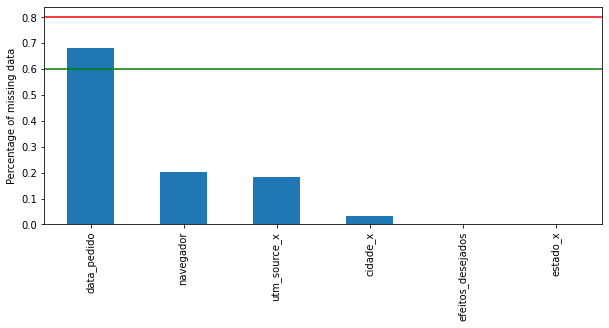

In [17]:
df[vars_with_na].isnull().mean().sort_values(
    ascending=False).plot.bar(figsize=(10, 4))
plt.ylabel('Percentage of missing data')
plt.axhline(y=0.80, color='r', linestyle='-')
plt.axhline(y=0.60, color='g', linestyle='-')

plt.show()

In [18]:
# now we can determine which variables, from those with missing data,

cat_na = [var for var in cat_vars if var in vars_with_na]
num_na = [var for var in num_vars if var in vars_with_na]

print('Number of categorical variables with na: ', len(cat_na))
print('Number of numerical variables with na: ', len(num_na))

Number of categorical variables with na:  5
Number of numerical variables with na:  0


In [19]:
num_na

[]

In [20]:
cat_na

['navegador', 'cidade_x', 'estado_x', 'utm_source_x', 'efeitos_desejados']

In [21]:
def analyse_na_value(df, var):

    # copy of the dataframe, so that we do not override the original data
    df = df.copy()

    # let's make an interim variable that indicates 1 if the
    # observation was missing or 0 otherwise
    df[var] = np.where(df[var].isnull(), 1, 0)

    tmp = df.groupby(var)['target'].agg(['count'])

    # plot into a bar graph
    tmp.plot(kind="barh", y="count", legend=False,
              title="Target", color='gray')

    plt.show()

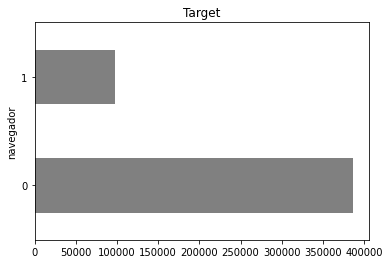

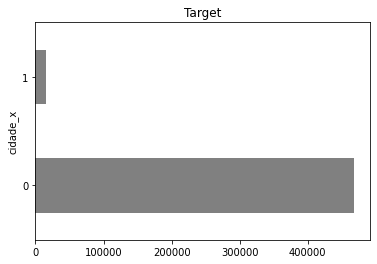

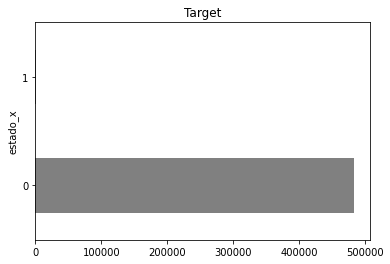

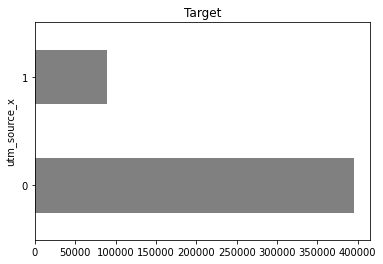

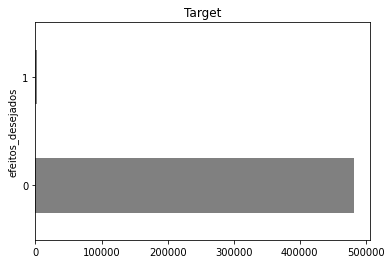

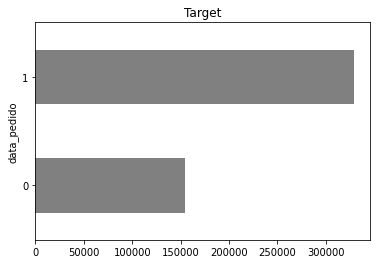

In [22]:
for var in vars_with_na:
    analyse_na_value(df, var)

Algumas dessas variáveis apresentaram essa grande quantidade de dados faltantes devido ao modelo de dados, iremos remover essas variáveis, porém iremos fazer uma análise mais detalhada para encontrar oportunidades de feature engineering.


### 4.Numerical variables

In [23]:
print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
df[num_vars].head()

Number of numerical variables:  1


,qtde_lavagem_semana
0,4
1,7
2,7
3,2
4,5


### Temporal variables

In [24]:
print('Number of temporal variables: ', len(temporal_variables))

Number of temporal variables:  2


In [25]:
temporal_variables

['data', 'data_pedido']

In [26]:
# Para as pessoas que realizaram a compra, qual a diferença de dias entre o formulário e a data de pedido? #status_pagamento = Entregue,Em transporte, Pagamento aprovado

In [27]:
#transform datetime
df['data_pedido'] = pd.to_datetime(df['data_pedido'])
df['data'] = pd.to_datetime(df['data'])
df['diferenca_dias'] = df['data_pedido'] - df['data']

#transform to days
df['diferenca_dias'] = df['diferenca_dias'].dt.days

<AxesSubplot:>

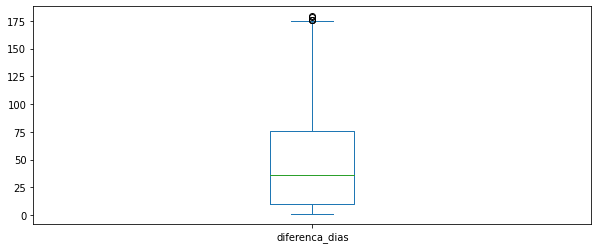

In [28]:
df[df.diferenca_dias >  0].diferenca_dias.plot(kind='box', figsize=(10, 4))

In [29]:
print(df[df.diferenca_dias >  0].diferenca_dias.describe())

count    49462.000000
mean        47.000303
std         41.511386
min          1.000000
25%         10.000000
50%         36.000000
75%         76.000000
max        179.000000
Name: diferenca_dias, dtype: float64


In [30]:
df.head()

,id_cliente,data,sistema_operacional,navegador,localizacao,locale_x,cidade_x,estado_x,qtde_lavagem_semana,utm_source_x,tipo_cabelo,comprimento,tipo_fios,procedimentos,tempo_procedimento,dieta,atividade_fisica,frequencia_estresse,caracteristica,faixa_etaria,efeitos_desejados,fragancia,data_pedido,target,diferenca_dias
0,d2620a3e6f00a6dc6e88,2022-01-03 15:42:22,iOS,Safari,"São Paulo, Sao Paulo",BR,SÃO PAULO,SAO PAULO,4,NaN,Tipo 2,Raíz exposta,Pontas duplas,Nenhum,Há 2 semanas,Celíaca,Frequente,Nunca,Característica 1,25 a 34,Efeito 7,Rosas,2022-01-03 15:47:35,1.0,0.0
1,9a48802d8290d19471f3,2022-01-04 08:39:53,Windows,Chrome,"Ribeirão Preto, Sao Paulo",BR,RIBEIRÃO PRETO,SAO PAULO,7,NaN,Tipo 4,Muito curto,Perfeitos,Todos acima,Há mais de 1 mês,Nenhuma restrição,Nunca,Nunca,Característica 6,55 a 64,Efeito 1,Eucalipto,2022-04-10 13:37:33,1.0,96.0
2,9a48802d8290d19471f3,2022-01-04 08:39:53,Windows,Chrome,"Ribeirão Preto, Sao Paulo",BR,RIBEIRÃO PRETO,SAO PAULO,7,NaN,Tipo 4,Muito curto,Perfeitos,Todos acima,Há mais de 1 mês,Nenhuma restrição,Nunca,Nunca,Característica 6,55 a 64,Efeito 1,Eucalipto,2022-04-10 13:43:05,1.0,96.0
3,c3344fad450ee424700d,2022-01-04 19:34:05,Android,Chrome,"São Paulo, Sao Paulo",BR,SÃO PAULO,SAO PAULO,2,NaN,Tipo 1,Extra longo,Rebeldes,Todos acima,Há mais de 1 mês,Nenhuma restrição,Raramente,Regularmente,Característica 7,2 a 10,Efeito 7,Rosas,NaT,0.0,NaN
4,8105e34124e90300d8b5,2022-01-05 18:29:41,Android,Chrome,"Manchester, England",BR,MANCHESTER,ENGLAND,5,NaN,Tipo 1,Extra longo,Rebeldes,Todos acima,Há mais de 1 mês,Celíaca,Raramente,Regularmente,Característica 7,25 a 34,Efeito 7,Rosas,NaT,0.0,NaN


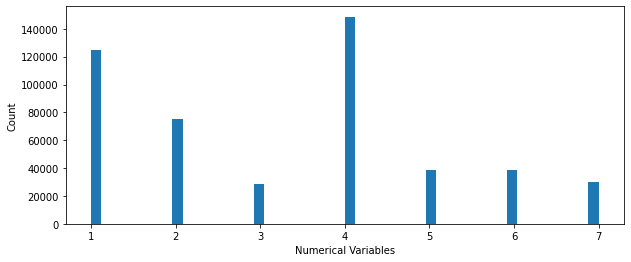

In [31]:
df[num_vars[0]].plot(kind='hist', figsize=(10, 4), bins=50)
plt.xlabel('Numerical Variables')
plt.ylabel('Count')
plt.show()

# Number of labels: Cardinality

<AxesSubplot:>

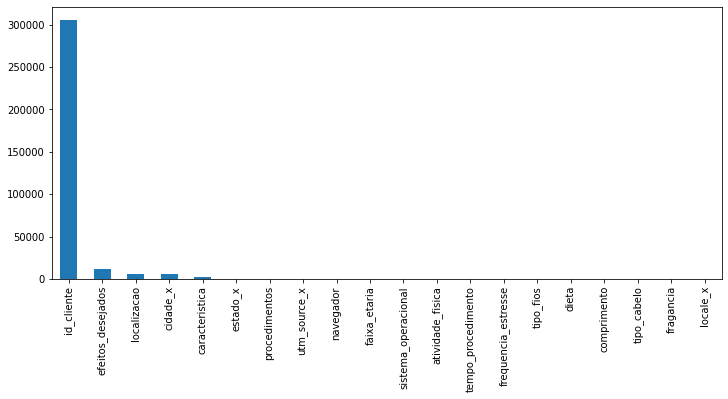

In [32]:
# we count unique categories with pandas unique()
# and then plot them in descending order

df[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

In [33]:
pd.DataFrame(
    {
        'columns': df.columns,
        'cardinality': df.nunique(),
        'dtype': df.dtypes,
        'null': df.isnull().sum()

    }
)

,columns,cardinality,dtype,null
id_cliente,id_cliente,305457,object,0
data,data,416261,datetime64[ns],0
sistema_operacional,sistema_operacional,6,object,0
navegador,navegador,8,object,97286
localizacao,localizacao,5679,object,0
locale_x,locale_x,1,object,0
cidade_x,cidade_x,5314,object,15965
estado_x,estado_x,327,object,209
qtde_lavagem_semana,qtde_lavagem_semana,7,int64,0
utm_source_x,utm_source_x,38,object,89060


## Rare Labels

In [34]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()

    # determine the % of observations per category
    tmp = df.groupby(var)['target'].count() / len(df)

    # return categories that are rare
    return tmp[tmp < rare_perc]

# print categories that are present in less than
# 1 % of the observations

for var in cat_vars:
    print(analyse_rare_labels(df, var, 0.01))
    print()

id_cliente
00000936326ac7177c62    0.000002
0000ef7fad80c2359144    0.000004
00011b3dda83acdf0d58    0.000004
00011c0bb9ed0eaf36c5    0.000002
00014b5928af30319cd9    0.000002
                          ...   
fffefa706df06fff92bc    0.000002
fffefcb200532b47df34    0.000002
ffffc7d0e15676698136    0.000002
ffffdc3c7b3343facdbf    0.000004
ffffe99b9a52fe4e1b33    0.000002
Name: target, Length: 305455, dtype: float64

sistema_operacional
 ChromeOS    0.000378
Mac OS       0.004393
Name: target, dtype: float64

navegador
ChromeiOS         0.005419
ChromiumEdge      0.003683
Firefox           0.003113
MSEdge            0.000006
Opera             0.001402
Yandex.Browser    0.000010
Name: target, dtype: float64

localizacao
A dos Ruivos, Leiria               0.000004
Abadia de Goias, Goias             0.000039
Abadiania, Goias                   0.000041
Abaete dos Mendes, Minas Gerais    0.000010
Abaete, Minas Gerais               0.000097
                                     ...   
Águeda M

In [35]:
df.procedimentos.replace('N/C','N_C', inplace=True)
df['procedimentos'] = df['procedimentos'].apply(lambda x: x.split(','))

In [36]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)

df = df.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(df.pop('procedimentos')),
                index=df.index,
                columns=mlb.classes_))


In [37]:
df.head()

,id_cliente,data,sistema_operacional,navegador,localizacao,locale_x,cidade_x,estado_x,qtde_lavagem_semana,utm_source_x,tipo_cabelo,comprimento,tipo_fios,tempo_procedimento,dieta,atividade_fisica,frequencia_estresse,caracteristica,faixa_etaria,efeitos_desejados,fragancia,data_pedido,target,diferenca_dias,Corte agressivo,Exposição ao sol,Nenhum,Tintura,Corte agressivo,Exposição ao sol,N_C,Nenhum,Tintura,Todos acima
0,d2620a3e6f00a6dc6e88,2022-01-03 15:42:22,iOS,Safari,"São Paulo, Sao Paulo",BR,SÃO PAULO,SAO PAULO,4,NaN,Tipo 2,Raíz exposta,Pontas duplas,Há 2 semanas,Celíaca,Frequente,Nunca,Característica 1,25 a 34,Efeito 7,Rosas,2022-01-03 15:47:35,1.0,0.0,0,0,0,0,0,0,0,1,0,0
1,9a48802d8290d19471f3,2022-01-04 08:39:53,Windows,Chrome,"Ribeirão Preto, Sao Paulo",BR,RIBEIRÃO PRETO,SAO PAULO,7,NaN,Tipo 4,Muito curto,Perfeitos,Há mais de 1 mês,Nenhuma restrição,Nunca,Nunca,Característica 6,55 a 64,Efeito 1,Eucalipto,2022-04-10 13:37:33,1.0,96.0,0,0,0,0,0,0,0,0,0,1
2,9a48802d8290d19471f3,2022-01-04 08:39:53,Windows,Chrome,"Ribeirão Preto, Sao Paulo",BR,RIBEIRÃO PRETO,SAO PAULO,7,NaN,Tipo 4,Muito curto,Perfeitos,Há mais de 1 mês,Nenhuma restrição,Nunca,Nunca,Característica 6,55 a 64,Efeito 1,Eucalipto,2022-04-10 13:43:05,1.0,96.0,0,0,0,0,0,0,0,0,0,1
3,c3344fad450ee424700d,2022-01-04 19:34:05,Android,Chrome,"São Paulo, Sao Paulo",BR,SÃO PAULO,SAO PAULO,2,NaN,Tipo 1,Extra longo,Rebeldes,Há mais de 1 mês,Nenhuma restrição,Raramente,Regularmente,Característica 7,2 a 10,Efeito 7,Rosas,NaT,0.0,NaN,0,0,0,0,0,0,0,0,0,1
4,8105e34124e90300d8b5,2022-01-05 18:29:41,Android,Chrome,"Manchester, England",BR,MANCHESTER,ENGLAND,5,NaN,Tipo 1,Extra longo,Rebeldes,Há mais de 1 mês,Celíaca,Raramente,Regularmente,Característica 7,25 a 34,Efeito 7,Rosas,NaT,0.0,NaN,0,0,0,0,0,0,0,0,0,1


In [38]:
df.efeitos_desejados.fillna('Sem_efeito', inplace=True)
df.efeitos_desejados.replace('N/C','N_C_efeito', inplace=True)
df['efeitos_desejados'] = df['efeitos_desejados'].apply(lambda x: x.split(','))

In [39]:

from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)

df = df.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(df.pop('efeitos_desejados')),
                index=df.index,
                columns=mlb.classes_))

### Drop columns

In [40]:
df.head()

,id_cliente,data,sistema_operacional,navegador,localizacao,locale_x,cidade_x,estado_x,qtde_lavagem_semana,utm_source_x,tipo_cabelo,comprimento,tipo_fios,tempo_procedimento,dieta,atividade_fisica,frequencia_estresse,caracteristica,faixa_etaria,fragancia,data_pedido,target,diferenca_dias,Corte agressivo,Exposição ao sol,Nenhum,Tintura,Corte agressivo,Exposição ao sol,N_C,Nenhum,Tintura,Todos acima,Efeito 1,Efeito 10,Efeito 2,Efeito 3,Efeito 4,Efeito 5,Efeito 6,Efeito 7,Efeito 8,Efeito 1,Efeito 10,Efeito 2,Efeito 3,Efeito 4,Efeito 5,Efeito 6,Efeito 7,Efeito 8,N_C_efeito,Sem_efeito
0,d2620a3e6f00a6dc6e88,2022-01-03 15:42:22,iOS,Safari,"São Paulo, Sao Paulo",BR,SÃO PAULO,SAO PAULO,4,NaN,Tipo 2,Raíz exposta,Pontas duplas,Há 2 semanas,Celíaca,Frequente,Nunca,Característica 1,25 a 34,Rosas,2022-01-03 15:47:35,1.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,9a48802d8290d19471f3,2022-01-04 08:39:53,Windows,Chrome,"Ribeirão Preto, Sao Paulo",BR,RIBEIRÃO PRETO,SAO PAULO,7,NaN,Tipo 4,Muito curto,Perfeitos,Há mais de 1 mês,Nenhuma restrição,Nunca,Nunca,Característica 6,55 a 64,Eucalipto,2022-04-10 13:37:33,1.0,96.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,9a48802d8290d19471f3,2022-01-04 08:39:53,Windows,Chrome,"Ribeirão Preto, Sao Paulo",BR,RIBEIRÃO PRETO,SAO PAULO,7,NaN,Tipo 4,Muito curto,Perfeitos,Há mais de 1 mês,Nenhuma restrição,Nunca,Nunca,Característica 6,55 a 64,Eucalipto,2022-04-10 13:43:05,1.0,96.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,c3344fad450ee424700d,2022-01-04 19:34:05,Android,Chrome,"São Paulo, Sao Paulo",BR,SÃO PAULO,SAO PAULO,2,NaN,Tipo 1,Extra longo,Rebeldes,Há mais de 1 mês,Nenhuma restrição,Raramente,Regularmente,Característica 7,2 a 10,Rosas,NaT,0.0,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,8105e34124e90300d8b5,2022-01-05 18:29:41,Android,Chrome,"Manchester, England",BR,MANCHESTER,ENGLAND,5,NaN,Tipo 1,Extra longo,Rebeldes,Há mais de 1 mês,Celíaca,Raramente,Regularmente,Característica 7,25 a 34,Rosas,NaT,0.0,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [41]:
df.frequencia_estresse.unique()

array(['Nunca', 'Regularmente', 'Quase sempre', 'Uma vez por mês'],
      dtype=object)

In [42]:
df.tipo_fios.unique()

array(['Pontas duplas', 'Perfeitos', 'Rebeldes', 'Secos'], dtype=object)

In [43]:
df.tempo_procedimento.unique()

array(['Há 2 semanas', 'Há mais de 1 mês', 'Há 1 semana',
       'Não houve procedimentos', 'Há 1 mês'], dtype=object)

In [44]:
df.dieta.unique()

array(['Celíaca', 'Nenhuma restrição', 'Intolerante a lactose', 'Leve'],
      dtype=object)

In [45]:
df.columns

Index(['id_cliente', 'data', 'sistema_operacional', 'navegador', 'localizacao',
       'locale_x', 'cidade_x', 'estado_x', 'qtde_lavagem_semana',
       'utm_source_x', 'tipo_cabelo', 'comprimento', 'tipo_fios',
       'tempo_procedimento', 'dieta', 'atividade_fisica',
       'frequencia_estresse', 'caracteristica', 'faixa_etaria', 'fragancia',
       'data_pedido', 'target', 'diferenca_dias', ' Corte agressivo',
       ' Exposição ao sol', ' Nenhum', ' Tintura', 'Corte agressivo',
       'Exposição ao sol', 'N_C', 'Nenhum', 'Tintura', 'Todos acima',
       ' Efeito 1', ' Efeito 10', ' Efeito 2', ' Efeito 3', ' Efeito 4',
       ' Efeito 5', ' Efeito 6', ' Efeito 7', ' Efeito 8', 'Efeito 1',
       'Efeito 10', 'Efeito 2', 'Efeito 3', 'Efeito 4', 'Efeito 5', 'Efeito 6',
       'Efeito 7', 'Efeito 8', 'N_C_efeito', 'Sem_efeito'],
      dtype='object')